In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
from scipy.optimize import curve_fit

## 一、定义函数

In [2]:
# file_name 为要读取的txt文件名称及后缀
def read_file_txt(file_name = " "):  # 定义一个函数用来读取txt文件，将水位信息数据读取成list
    data_f = open(file_name, "r")  # 打开给定的txt文件
    data_lines = data_f.readlines()  # 读取txt文件中的文本
    data = []  # 定义一个空列表data用来存储数据
    for item in data_lines:  # 循环遍历data_lines中的行
        elem = item.split(' ')  # 按" "分隔符来读取文本
        for item0 in elem:  # 循环遍历elem中的字符串
            data.append(item0.rstrip())  # 将读取分割的字符串存储到data list中
    data_f.close()  # 关闭给定的txt文件

    return data  # 返回数据列表


# whole_str 为总的字符串
# target 为要查找的字符
def find_speci_str(whole_str, target):  # 定义一个函数用来查找给定的总字符串中是否包含给定的字符，如果有，则会输出该字符在字符串中的所有位置的list；如果没有，则会返回空list
    index_list = []  # 创建一个空集合用来存储目标字符的index
    for i in range(len(whole_str)):  # for循环遍历，范围为总字符串whole_str的长度
        if (whole_str[i] == target):  # 遍历判断总字符串的每个字符是否是需要查找的target字符
            index_list.append(i)  # 如果是的话将给字符所在位置存储到index_list中，反之不管

    return index_list  # 返回index_list


# whole_str_list 为x轴list和y轴list存储到一个总的list里，x轴在前，y轴在后
# target 为要删除的字符
def delete_speci_str_tf(whole_str_list=[], target=""):  # 定义一个函数用来在给定的总字符串中删除给定的字符，并且删除x_list中index相对应的元素，以保证一一对应；之后，将处理完的元素float后存储到whole_list中
    x_list = whole_str_list[0]  # 将x轴list提取出来
    y_list = whole_str_list[1]  # 将y轴list提取出来
    whole_list = []  # 定义一个空list，用于存储处理后的list
    index_speci_str = find_speci_str(y_list, target)  # 使用先前定义的find_speci_str()函数，得到需要删除的元素的index
    add_ind = 0  # 定义一个变量用于动态计数删除元素（因为当删除一个元素后，list中在删掉元素的后边index会相对原先的减一）
    for ind in index_speci_str:  # for循环遍历index_speci_str的元素
        del x_list[ind - add_ind]  # 删除x轴中相对应target元素index的元素
        del y_list[ind - add_ind]  # 删除target元素
        add_ind += 1  # 计数变量值加一

    for elem in y_list:  # for循环遍历y_list中的元素
        whole_list.append(float(elem))  # 将y_list中的每个元素float化
    
    return [x_list, whole_list]  # 返回处理完的x_list额y_list
    

# x 为横坐标list
# mu 为均值
# sigma 为标准差
# A 为倍数
def gaussian_fit(x, mu, sigma, A):  # 定义一个函数用来用正态分布拟合给定的list
    return A * norm.pdf(x, mu, sigma)  # 返回正态分布函数


# x 为横坐标list
# alpha 为形状参数
# beta 为速率参数
# A 为倍数
def gamma_fit(x, alpha, beta, A):  # 定义一个函数用来用gamma分布拟合给定的list
    return A * gamma.pdf(x, alpha, beta)  # 返回伽马分布函数


# target_list 为目标list
# ratio1 为第一个分列表部分比
# ratio2 为第二个分列表部分比
# round_type 为取整的方法
def divide_list(target_list, ratio1, ratio2, round_type="ceil"):  # 定义一个函数用来将目标list拆分成两部分
    if (round_type == "ceil"):  # 判断如果round_type为"ceil"，向上取整
        left_half = target_list[:math.ceil(ratio1 * len(target_list))]  # 前部分列表为target_list前ratio1部分的元素（向上取整）
        right_half = target_list[math.ceil(ratio2 * len(target_list)):]  # 后部分列表为target_list后ratio2部分的元素（向上取整）
    elif (round_type == "floor"):  # 判断如果round_type为"floor"，向下取整
        left_half = target_list[:math.floor(ratio1 * len(target_list))]  # 前部分列表为target_list前ratio1部分的元素（向下取整）
        right_half = target_list[math.floor(ratio2 * len(target_list)):]  # 后部分列表为target_list后ratio2部分的元素（向下取整）

    return [left_half, right_half]  # 返回前部分和后部分


# data_list 为要处理的列表的总列表
def union_list(data_list):  # 定义一个函数用来取多个列表图像的并，即取每个x轴对应的多个列表的元素的最大值
    divi_list = []  # 定义一个空列表divi_list用来存储每个特定x轴对应的多个list的值
    whole_list = []  # 定义一个空列表whole_list用来存储处理完的列表
    len_data = len(data_list[0])  # 定义len_data为data_list中第一个列表的长度
    for i in range(len_data):  # for循环遍历，范围为len_data的值
        for j in range(len(data_list)):  # for循环遍历，范围为data_list的长度
            divi_list.append(data_list[j][i])  # 将data_list中第j个列表的第i个元素存储到divi_list中
        whole_list.append(max(divi_list))  # 取最大值，已达到数学上“并集”的效果
        divi_list = []  # 初始化divi_list，开始新的循环

    return whole_list  # 返回whole_list


# x 为横坐标list
# data_list 为要处理的列表的总列表
# y_name 为y轴名称
def vio_set(x, data_list, y_name="Waterlevel [m]"):  # 定义一个函数用来配置画小提琴图时的数据处理
    if (y_name == "Waterlevel [m]"):  # 判断当y_name等于"Waterlevel [m]"时
        vio = pd.DataFrame({"Date": x, 
                            "Hongzehu": data_list[0], 
                            "Jiangba": data_list[1]})
        data_vio = vio.melt(id_vars="Date", 
                            value_vars=["Hongzehu", "Jiangba"], 
                            var_name="Lake and Dam", 
                            value_name=y_name)
    else:  # 判断当y_name等于除"Waterlevel [m]"的值时
        vio = pd.DataFrame({"Date": x, 
                            "Waterhead": data_list[0]})
        data_vio = vio.melt(id_vars="Date", 
                            value_vars="Waterhead", 
                            var_name="Lake and Dam", 
                            value_name=y_name)        

    return data_vio  # 返回data_vio

## 二、读取及规范数据

In [3]:
# 读取数据文件，并创建对应的x轴
twozero_hongzehu_shuiwei = read_file_txt("2020_hongzehu.txt")
x_twozero_hongzehu_shuiwei = list(np.arange(1, len(twozero_hongzehu_shuiwei) + 1, 1))

twozero_jiangba_shuiwei = read_file_txt("2020_jiangba.txt")
x_twozero_jiangba_shuiwei = list(np.arange(1, len(twozero_jiangba_shuiwei) + 1, 1))

twoone_hongzehu_shuiwei = read_file_txt("2021_hongzehu.txt")
x_twoone_hongzehu_shuiwei = list(np.arange(1, len(twoone_hongzehu_shuiwei) + 1, 1))

twoone_jiangba_shuiwei = read_file_txt("2021_jiangba.txt")
x_twoone_jiangba_shuiwei = list(np.arange(1, len(twoone_jiangba_shuiwei) + 1, 1))

twotwo_hongzehu_shuiwei = read_file_txt("2022_hongzehu.txt")
x_twotwo_hongzehu_shuiwei = list(np.arange(1, len(twotwo_hongzehu_shuiwei) + 1, 1))

twotwo_jiangba_shuiwei = read_file_txt("2022_jiangba.txt")
x_twotwo_jiangba_shuiwei = list(np.arange(1, len(twotwo_jiangba_shuiwei) + 1, 1))

twothree_hongzehu_shuiwei = read_file_txt("2023_hongzehu.txt")
x_twothree_hongzehu_shuiwei = list(np.arange(1, len(twothree_hongzehu_shuiwei) + 1, 1))

twothree_jiangba_shuiwei = read_file_txt("2023_jiangba.txt")
x_twothree_jiangba_shuiwei = list(np.arange(1, len(twothree_jiangba_shuiwei) + 1, 1))

twofour_hongzehu_shuiwei = read_file_txt("2024_hongzehu.txt")
x_twofour_hongzehu_shuiwei = list(np.arange(1, len(twofour_hongzehu_shuiwei) + 1, 1))

twofour_jiangba_shuiwei = read_file_txt("2024_jiangba.txt")
x_twofour_jiangba_shuiwei = list(np.arange(1, len(twofour_jiangba_shuiwei) + 1, 1))

In [4]:
# 将每个数据中因缺失而导致的""删除，并删除""对应的x轴的index的元素，以一一对应；将处理完的y轴列表float化
x_twozero_hongzehu_shuiwei, twozero_hongzehu_shuiwei_float = delete_speci_str_tf([x_twozero_hongzehu_shuiwei, twozero_hongzehu_shuiwei])
x_twozero_jiangba_shuiwei, twozero_jiangba_shuiwei_float = delete_speci_str_tf([x_twozero_jiangba_shuiwei, twozero_jiangba_shuiwei])

x_twoone_hongzehu_shuiwei, twoone_hongzehu_shuiwei_float = delete_speci_str_tf([x_twoone_hongzehu_shuiwei, twoone_hongzehu_shuiwei])
x_twoone_jiangba_shuiwei, twoone_jiangba_shuiwei_float = delete_speci_str_tf([x_twoone_jiangba_shuiwei, twoone_jiangba_shuiwei])

x_twotwo_hongzehu_shuiwei, twotwo_hongzehu_shuiwei_float = delete_speci_str_tf([x_twotwo_hongzehu_shuiwei, twotwo_hongzehu_shuiwei])
x_twotwo_jiangba_shuiwei, twotwo_jiangba_shuiwei_float = delete_speci_str_tf([x_twotwo_jiangba_shuiwei, twotwo_jiangba_shuiwei])

x_twothree_hongzehu_shuiwei, twothree_hongzehu_shuiwei_float = delete_speci_str_tf([x_twothree_hongzehu_shuiwei, twothree_hongzehu_shuiwei])
x_twothree_jiangba_shuiwei, twothree_jiangba_shuiwei_float = delete_speci_str_tf([x_twothree_jiangba_shuiwei, twothree_jiangba_shuiwei])

x_twofour_hongzehu_shuiwei, twofour_hongzehu_shuiwei_float = delete_speci_str_tf([x_twofour_hongzehu_shuiwei, twofour_hongzehu_shuiwei])
x_twofour_jiangba_shuiwei, twofour_jiangba_shuiwei_float = delete_speci_str_tf([x_twofour_jiangba_shuiwei, twofour_jiangba_shuiwei])

## 三、数据分析

## 2020年度

## （一）2020年洪泽湖和蒋坝平均水位变化图

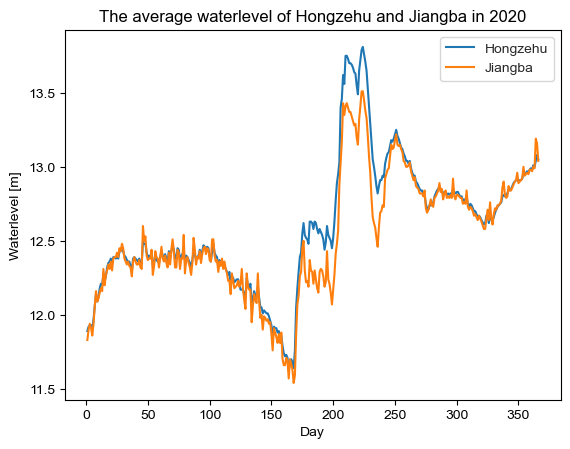

In [5]:
# 画2020年洪泽湖和蒋坝平均水位变化图
plt.plot(x_twozero_hongzehu_shuiwei, twozero_hongzehu_shuiwei_float, label="Hongzehu")
plt.plot(x_twozero_jiangba_shuiwei, twozero_jiangba_shuiwei_float, label="Jiangba")
#plt.xlim(100, 200)
sns.set_style("whitegrid")
plt.title("The average waterlevel of Hongzehu and Jiangba in 2020")
plt.xlabel("Day")
plt.ylabel("Waterlevel [m]")
plt.legend()
plt.show()

## （二）2020年洪泽湖和蒋坝平均水位Count图、核密度估计及小提琴图

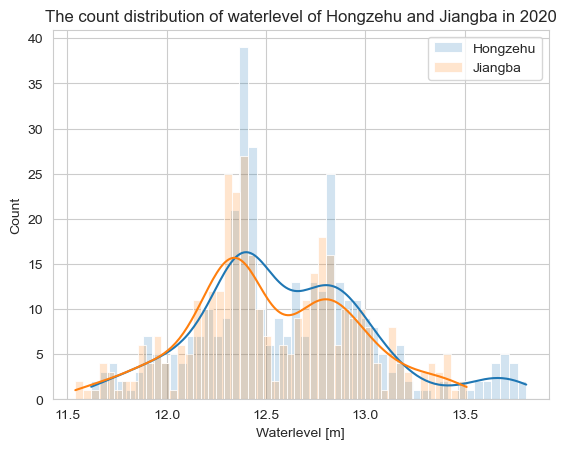

In [6]:
sns.histplot(twozero_hongzehu_shuiwei_float, bins=50, alpha=0.2, label="Hongzehu", kde=True)
sns.histplot(twozero_jiangba_shuiwei_float, bins=50, alpha=0.2, label="Jiangba", kde=True)
plt.xlabel("Waterlevel [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterlevel of Hongzehu and Jiangba in 2020")
plt.legend()
plt.show()

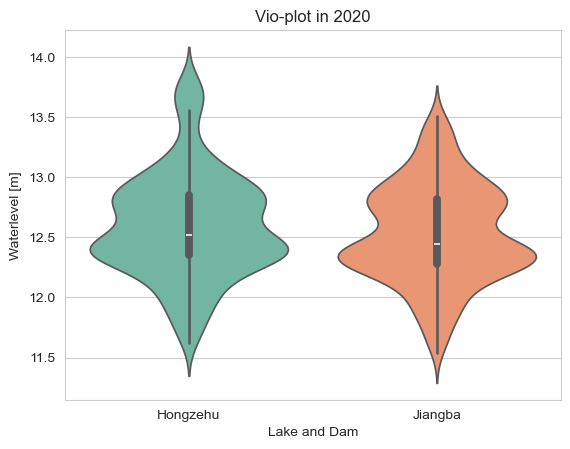

In [7]:
sns.violinplot(x="Lake and Dam", y="Waterlevel [m]", data=vio_set(x_twozero_hongzehu_shuiwei, [twozero_hongzehu_shuiwei_float, twozero_jiangba_shuiwei_float]), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2020")
plt.show()

## （三）2020年洪泽湖和蒋坝水位差变化图及正态分布拟合

In [8]:
twozero_shuiweicha = np.array(twozero_hongzehu_shuiwei_float) - np.array(twozero_jiangba_shuiwei_float)

In [9]:
params_twozero, _ = curve_fit(gaussian_fit, x_twozero_hongzehu_shuiwei, abs(twozero_shuiweicha))
mu_twozero, sigma_twozero, A_twozero = params_twozero

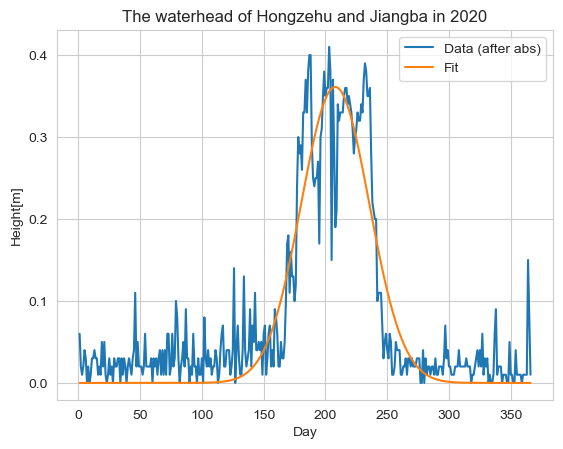

In [10]:
plt.plot(x_twozero_hongzehu_shuiwei, abs(twozero_shuiweicha), label="Data (after abs)")
plt.plot(x_twozero_hongzehu_shuiwei, gaussian_fit(x_twozero_hongzehu_shuiwei, mu_twozero, sigma_twozero, A_twozero), label="Fit")
#plt.xlim(100, 200)
plt.title("The waterhead of Hongzehu and Jiangba in 2020")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

In [11]:
print("mu =", mu_twozero)
print("sigma =", sigma_twozero)
print("A =", A_twozero)

mu = 207.92267493156305
sigma = 27.545756571714943
A = 24.93575756561633


 ## （四）2020年洪泽湖和蒋坝水位差Count图、核密度估计及小提琴图

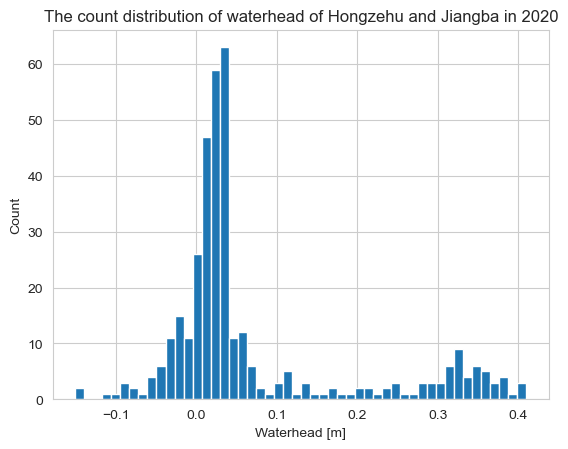

In [12]:
n_twozero, bins_twozero, patches_twozero = plt.hist(twozero_shuiweicha, bins=50)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2020")
plt.show()

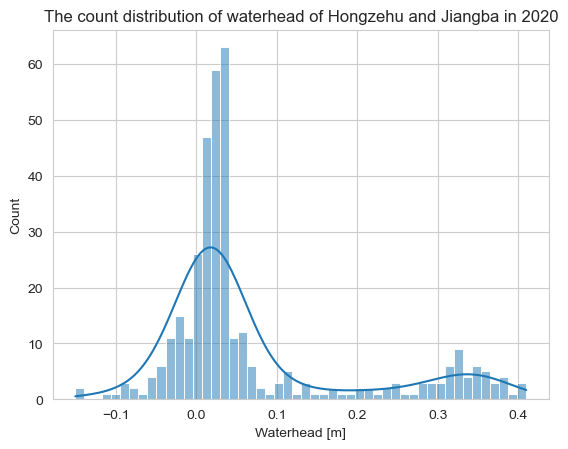

In [13]:
sns.histplot(twozero_shuiweicha, bins=50, kde=True)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2020")
plt.show()

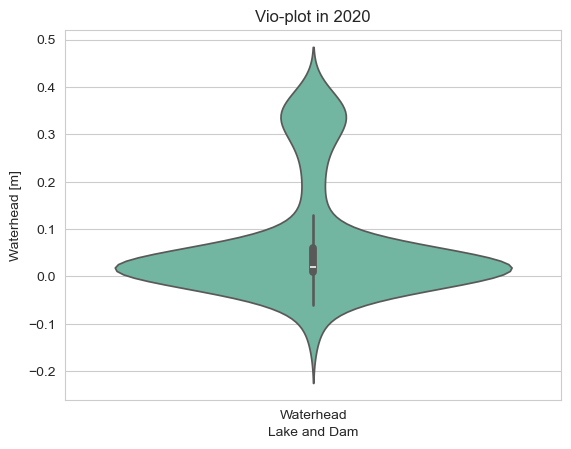

In [14]:
sns.violinplot(x="Lake and Dam", y="Waterhead [m]", data=vio_set(x_twozero_hongzehu_shuiwei, [twozero_shuiweicha], "Waterhead [m]"), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2020")
plt.show()

## 2021年度

## （一）2021年洪泽湖和蒋坝平均水位变化图

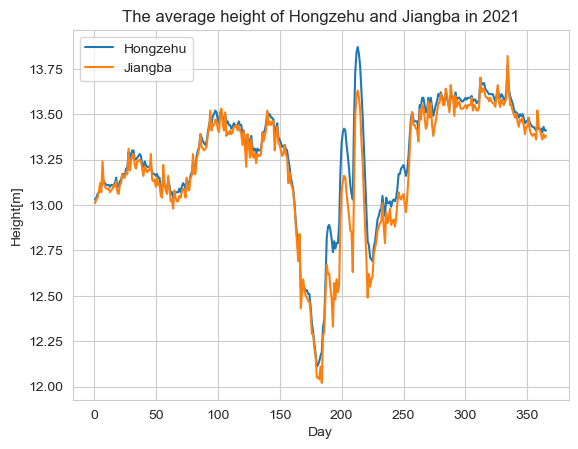

In [15]:
# 画2021年洪泽湖和蒋坝平均水位变化图
plt.plot(x_twoone_hongzehu_shuiwei, twoone_hongzehu_shuiwei_float, label="Hongzehu")
plt.plot(x_twoone_jiangba_shuiwei, twoone_jiangba_shuiwei_float, label="Jiangba")
#plt.xlim(100, 200)
plt.title("The average height of Hongzehu and Jiangba in 2021")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

## （二）2021年洪泽湖和蒋坝平均水位Count图、核密度估计及小提琴图

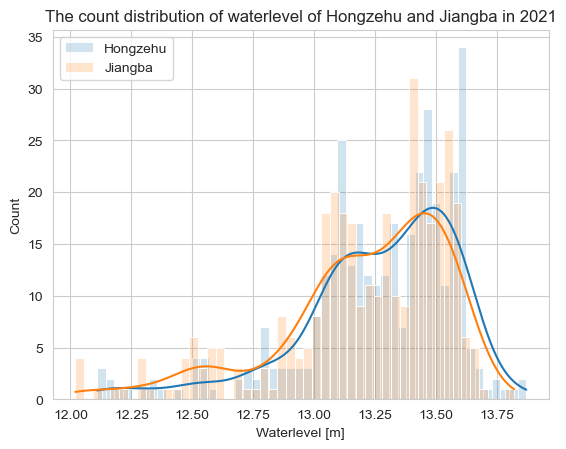

In [16]:
sns.histplot(twoone_hongzehu_shuiwei_float, bins=50, alpha=0.2, label="Hongzehu", kde=True)
sns.histplot(twoone_jiangba_shuiwei_float, bins=50, alpha=0.2, label="Jiangba", kde=True)
plt.xlabel("Waterlevel [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterlevel of Hongzehu and Jiangba in 2021")
plt.legend()
plt.show()

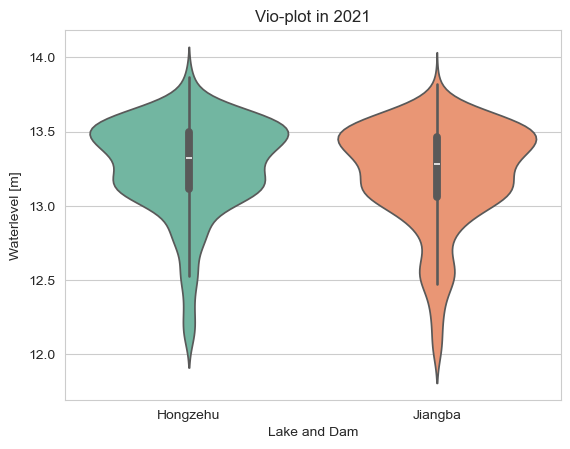

In [17]:
sns.violinplot(x="Lake and Dam", y="Waterlevel [m]", data=vio_set(x_twoone_hongzehu_shuiwei, [twoone_hongzehu_shuiwei_float, twoone_jiangba_shuiwei_float]), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2021")
plt.show()

## （三）2021年洪泽湖和蒋坝水位差变化图及正态分布拟合

In [18]:
twoone_shuiweicha = np.array(twoone_hongzehu_shuiwei_float) - np.array(twoone_jiangba_shuiwei_float)

In [19]:
params_twoone, _ = curve_fit(gaussian_fit, x_twoone_hongzehu_shuiwei, abs(twoone_shuiweicha))
mu_twoone, sigma_twoone, A_twoone = params_twoone

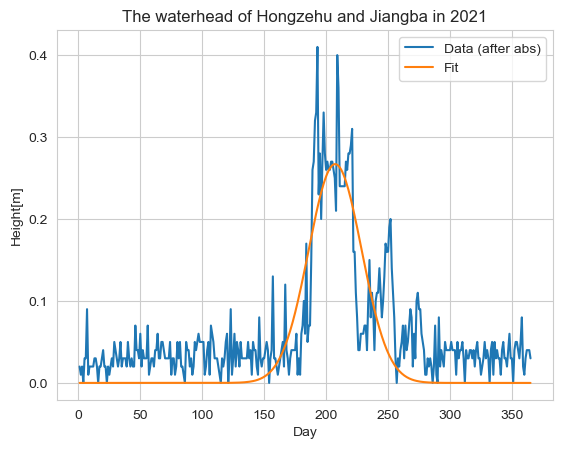

In [20]:
plt.plot(x_twoone_hongzehu_shuiwei, abs(twoone_shuiweicha), label="Data (after abs)")
plt.plot(x_twoone_hongzehu_shuiwei, gaussian_fit(x_twoone_hongzehu_shuiwei, mu_twoone, sigma_twoone, A_twoone), label="Fit")
#plt.xlim(100, 200)
plt.title("The waterhead of Hongzehu and Jiangba in 2021")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

In [21]:
print("mu =", mu_twoone)
print("sigma =", sigma_twoone)
print("A =", A_twoone)

mu = 207.29885028335252
sigma = 21.444230944642676
A = 14.351984509656162


 ## （四）2021年洪泽湖和蒋坝水位差Count图、核密度估计及小提琴图

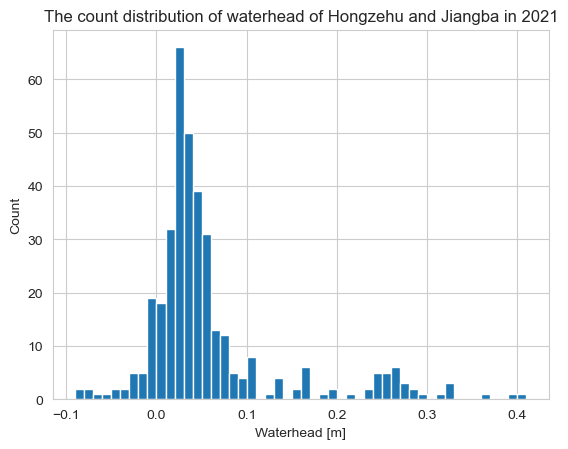

In [22]:
n_twoone, bins_twoone, patches_twoone = plt.hist(twoone_shuiweicha, bins=50)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2021")
plt.show()

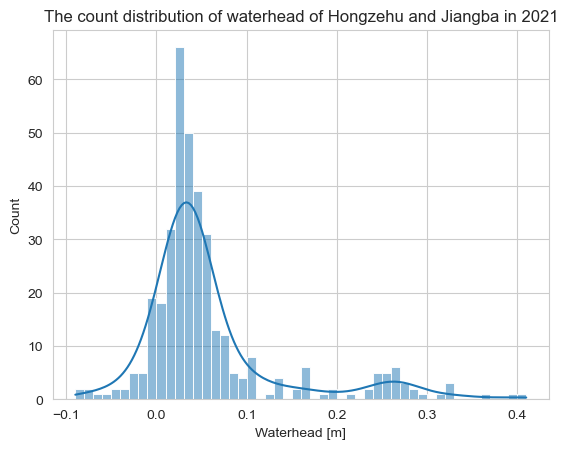

In [23]:
sns.histplot(twoone_shuiweicha, bins=50, kde=True)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2021")
plt.show()

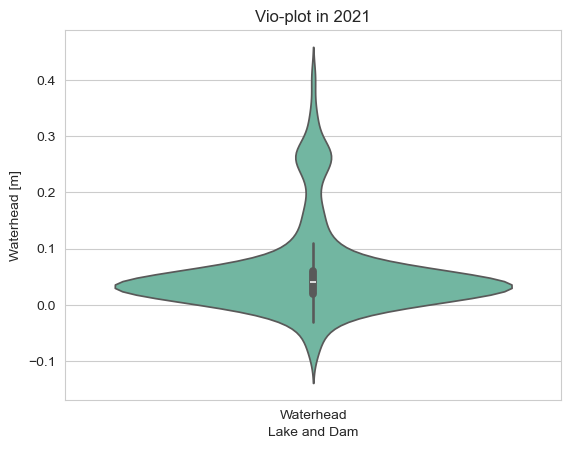

In [24]:
sns.violinplot(x="Lake and Dam", y="Waterhead [m]", data=vio_set(x_twoone_hongzehu_shuiwei, [twoone_shuiweicha], "Waterhead [m]"), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2021")
plt.show()

## 2022年度

## （一）2022年洪泽湖和蒋坝平均水位变化图

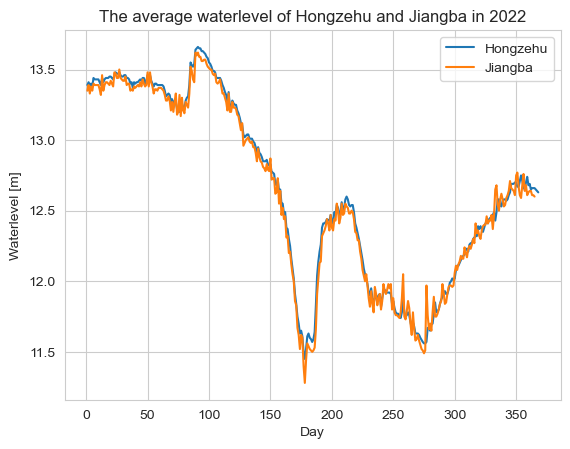

In [25]:
# 画2022年洪泽湖和蒋坝平均水位变化图
plt.plot(x_twotwo_hongzehu_shuiwei, twotwo_hongzehu_shuiwei_float, label="Hongzehu")
plt.plot(x_twotwo_jiangba_shuiwei, twotwo_jiangba_shuiwei_float, label="Jiangba")
#plt.xlim(100, 200)
sns.set_style("whitegrid")
plt.title("The average waterlevel of Hongzehu and Jiangba in 2022")
plt.xlabel("Day")
plt.ylabel("Waterlevel [m]")
plt.legend()
plt.show()

## （二）2022年洪泽湖和蒋坝平均水位Count图、核密度估计及小提琴图

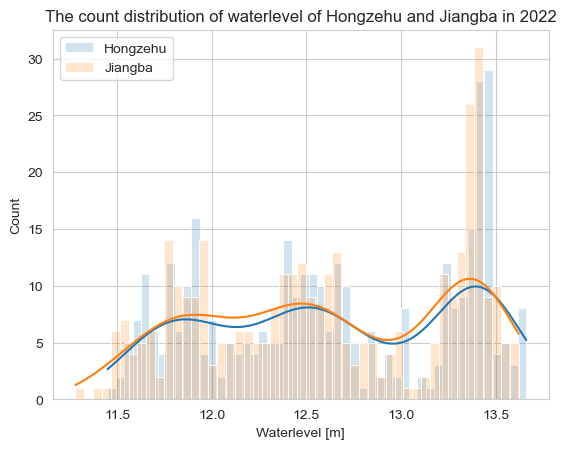

In [26]:
sns.histplot(twotwo_hongzehu_shuiwei_float, bins=50, alpha=0.2, label="Hongzehu", kde=True)
sns.histplot(twotwo_jiangba_shuiwei_float, bins=50, alpha=0.2, label="Jiangba", kde=True)
plt.xlabel("Waterlevel [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterlevel of Hongzehu and Jiangba in 2022")
plt.legend()
plt.show()

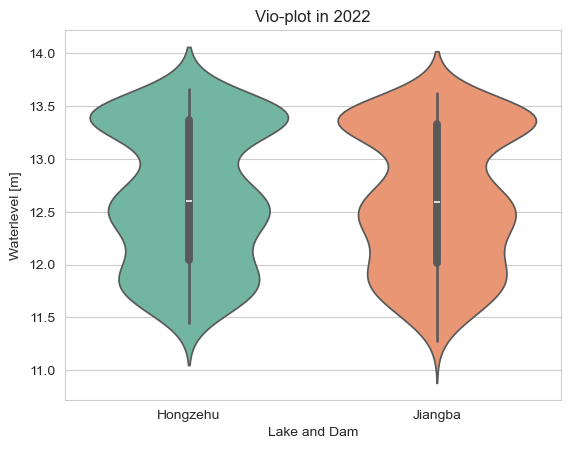

In [27]:
sns.violinplot(x="Lake and Dam", y="Waterlevel [m]", data=vio_set(x_twotwo_hongzehu_shuiwei, [twotwo_hongzehu_shuiwei_float, twotwo_jiangba_shuiwei_float]), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2022")
plt.show()

## （三）2022年洪泽湖和蒋坝水位差变化图及正态分布拟合

In [28]:
twotwo_shuiweicha = np.array(twotwo_hongzehu_shuiwei_float) - np.array(twotwo_jiangba_shuiwei_float)

In [29]:
params_twotwo, _ = curve_fit(gaussian_fit, x_twotwo_hongzehu_shuiwei, abs(twotwo_shuiweicha))
mu_twotwo, sigma_twotwo, A_twotwo = params_twotwo

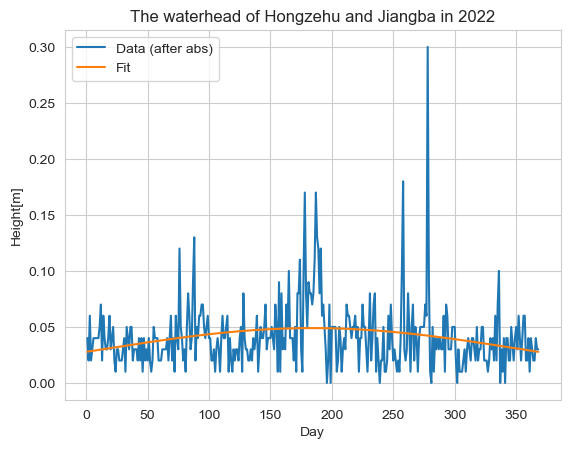

In [30]:
plt.plot(x_twotwo_hongzehu_shuiwei, abs(twotwo_shuiweicha), label="Data (after abs)")
plt.plot(x_twotwo_hongzehu_shuiwei, gaussian_fit(x_twotwo_hongzehu_shuiwei, mu_twotwo, sigma_twotwo, A_twotwo), label="Fit")
#plt.xlim(100, 200)
plt.title("The waterhead of Hongzehu and Jiangba in 2022")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

In [31]:
print("mu =", mu_twotwo)
print("sigma =", sigma_twotwo)
print("A =", A_twotwo)

mu = 184.08014604510495
sigma = 172.6533362126377
A = 21.18872655218972


 ## （四）2022年洪泽湖和蒋坝水位差Count图、核密度估计及小提琴图

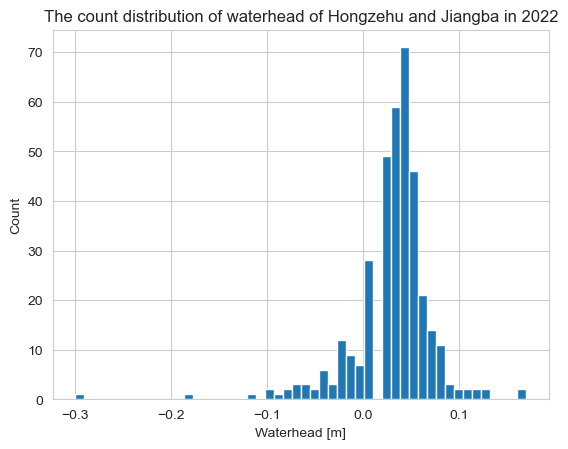

In [32]:
n_twotwo, bins_twotwo, patches_twotwo = plt.hist(twotwo_shuiweicha, bins=50)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2022")
plt.show()

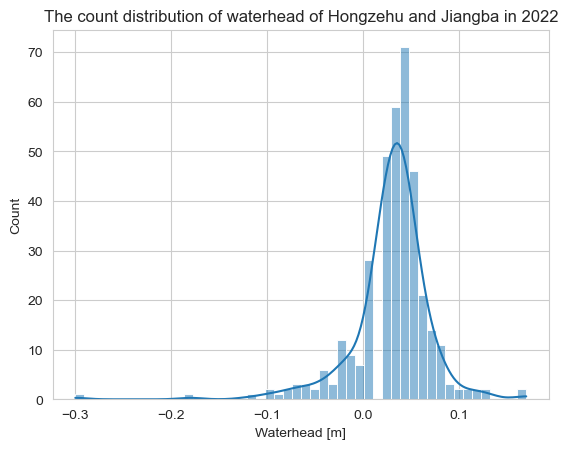

In [33]:
sns.histplot(twotwo_shuiweicha, bins=50, kde=True)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2022")
plt.show()

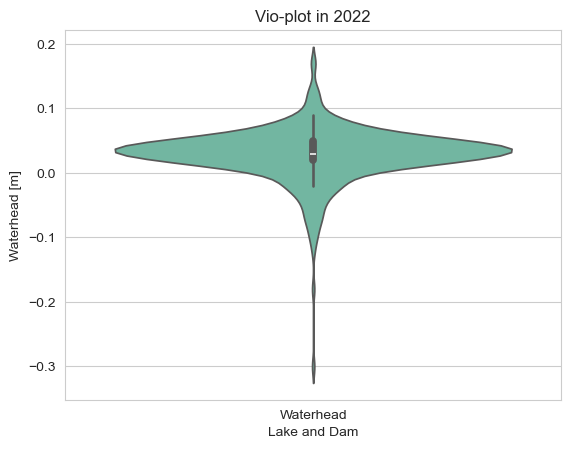

In [34]:
sns.violinplot(x="Lake and Dam", y="Waterhead [m]", data=vio_set(x_twotwo_hongzehu_shuiwei, [twotwo_shuiweicha], "Waterhead [m]"), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2022")
plt.show()

## 2023年度

## （一）2023年洪泽湖和蒋坝平均水位变化图

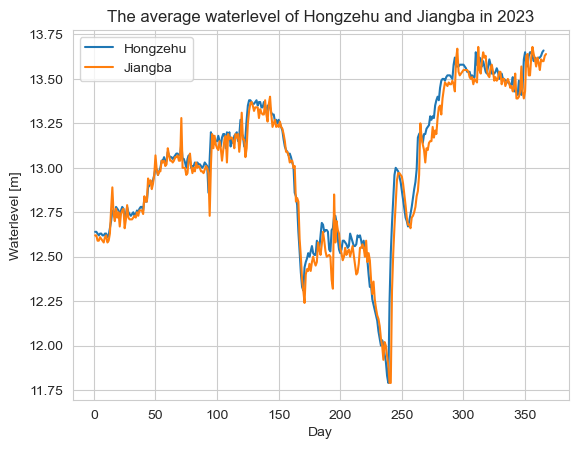

In [35]:
# 画2023年洪泽湖和蒋坝平均水位变化图
plt.plot(x_twothree_hongzehu_shuiwei, twothree_hongzehu_shuiwei_float, label="Hongzehu")
plt.plot(x_twothree_jiangba_shuiwei, twothree_jiangba_shuiwei_float, label="Jiangba")
#plt.xlim(100, 200)
sns.set_style("whitegrid")
plt.title("The average waterlevel of Hongzehu and Jiangba in 2023")
plt.xlabel("Day")
plt.ylabel("Waterlevel [m]")
plt.legend()
plt.show()

## （二）2023年洪泽湖和蒋坝平均水位Count图、核密度估计及小提琴图

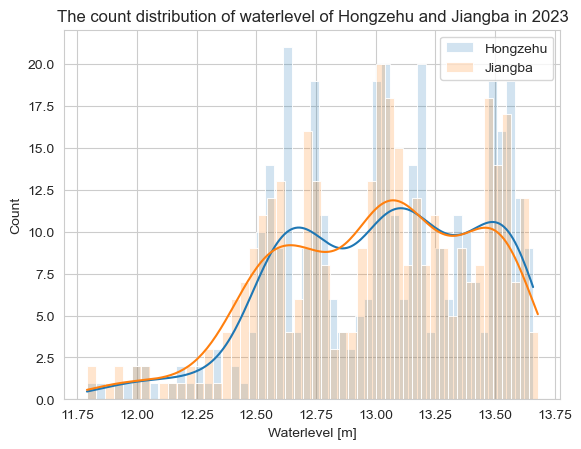

In [36]:
sns.histplot(twothree_hongzehu_shuiwei_float, bins=50, alpha=0.2, label="Hongzehu", kde=True)
sns.histplot(twothree_jiangba_shuiwei_float, bins=50, alpha=0.2, label="Jiangba", kde=True)
plt.xlabel("Waterlevel [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterlevel of Hongzehu and Jiangba in 2023")
plt.legend()
plt.show()

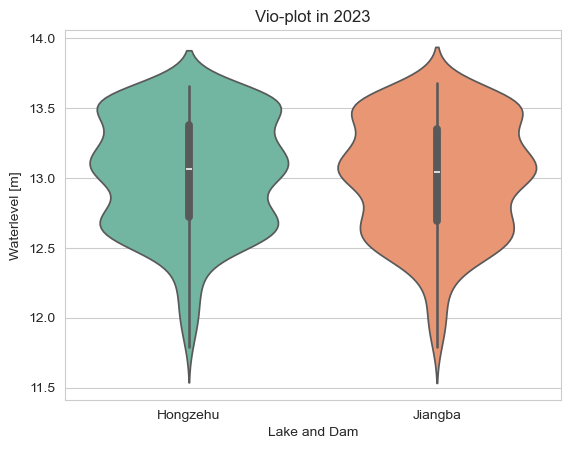

In [37]:
sns.violinplot(x="Lake and Dam", y="Waterlevel [m]", data=vio_set(x_twothree_hongzehu_shuiwei, [twothree_hongzehu_shuiwei_float, twothree_jiangba_shuiwei_float]), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2023")
plt.show()

## （三）2023年洪泽湖和蒋坝水位差变化图及正态分布拟合

In [38]:
twothree_shuiweicha = np.array(twothree_hongzehu_shuiwei_float) - np.array(twothree_jiangba_shuiwei_float)

In [39]:
params_twothree, _ = curve_fit(gaussian_fit, x_twothree_hongzehu_shuiwei, abs(twothree_shuiweicha))
mu_twothree, sigma_twothree, A_twothree = params_twothree

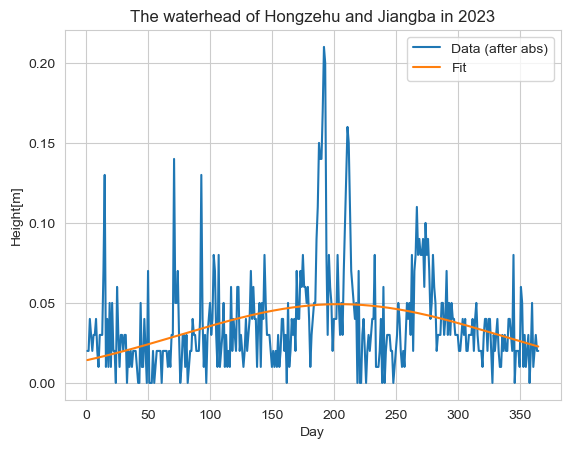

In [40]:
plt.plot(x_twothree_hongzehu_shuiwei, abs(twothree_shuiweicha), label="Data (after abs)")
plt.plot(x_twothree_hongzehu_shuiwei, gaussian_fit(x_twothree_hongzehu_shuiwei, mu_twothree, sigma_twothree, A_twothree), label="Fit")
#plt.xlim(100, 200)
plt.title("The waterhead of Hongzehu and Jiangba in 2023")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

In [41]:
print("mu =", mu_twothree)
print("sigma =", sigma_twothree)
print("A =", A_twothree)

mu = 204.39541572844334
sigma = 129.28478322591687
A = 15.952403874961254


 ## （四）2023年洪泽湖和蒋坝水位差Count图、核密度估计及小提琴图

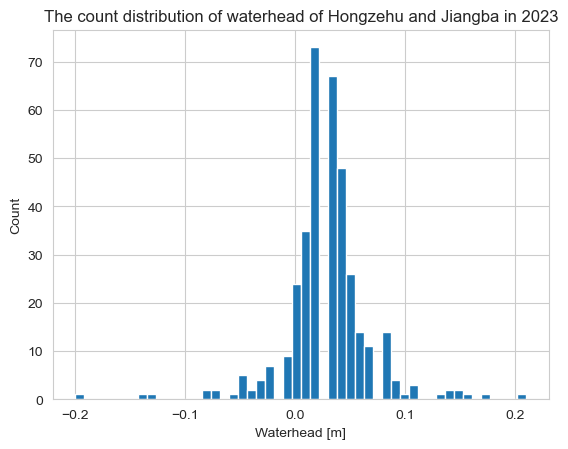

In [42]:
n_twothree, bins_twothree, patches_twothree = plt.hist(twothree_shuiweicha, bins=50)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2023")
plt.show()

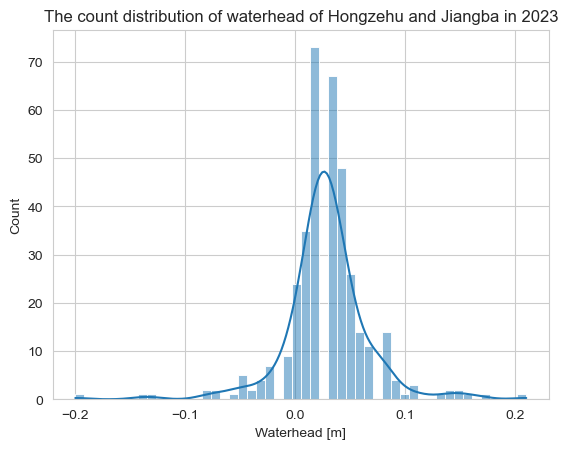

In [43]:
sns.histplot(twothree_shuiweicha, bins=50, kde=True)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2023")
plt.show()

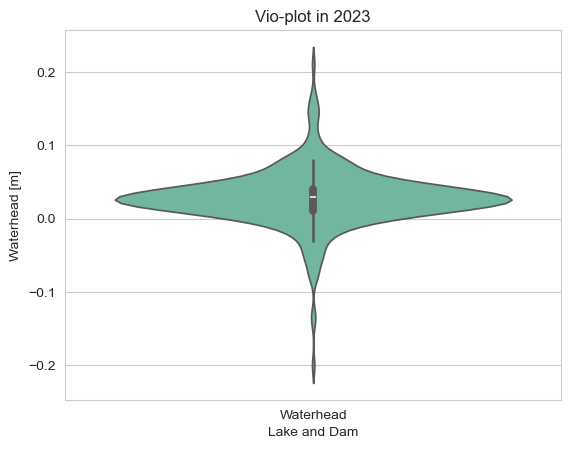

In [44]:
sns.violinplot(x="Lake and Dam", y="Waterhead [m]", data=vio_set(x_twothree_hongzehu_shuiwei, [twothree_shuiweicha], "Waterhead [m]"), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2023")
plt.show()

## 2024年度

## （一）2024年洪泽湖和蒋坝平均水位变化图

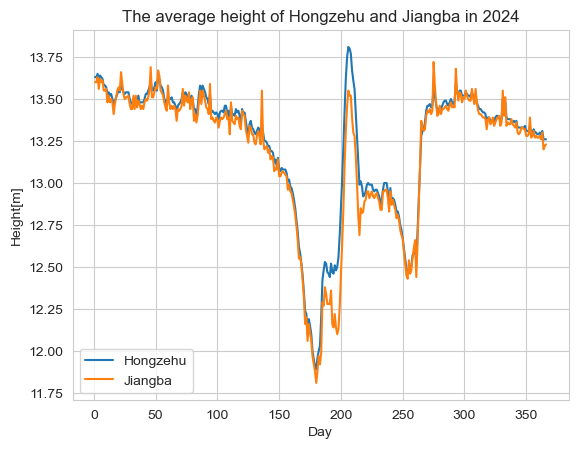

In [45]:
plt.plot(x_twofour_hongzehu_shuiwei, twofour_hongzehu_shuiwei_float, label="Hongzehu")
plt.plot(x_twofour_jiangba_shuiwei, twofour_jiangba_shuiwei_float, label="Jiangba")
#plt.xlim(100, 200)
plt.title("The average height of Hongzehu and Jiangba in 2024")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

## （二）2024年洪泽湖和蒋坝平均水位Count图及核密度估计

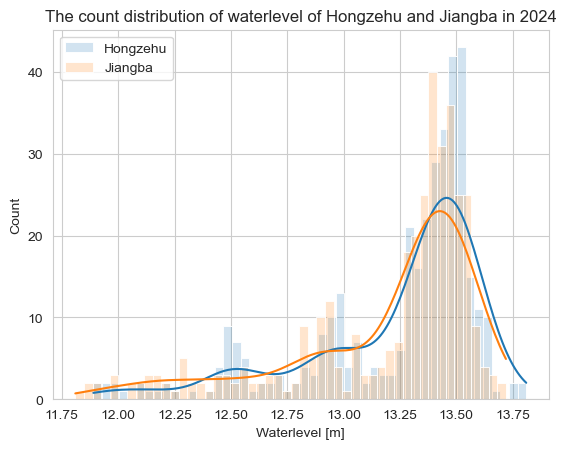

In [46]:
sns.histplot(twofour_hongzehu_shuiwei_float, bins=50, alpha=0.2, label="Hongzehu", kde=True)
sns.histplot(twofour_jiangba_shuiwei_float, bins=50, alpha=0.2, label="Jiangba", kde=True)
plt.xlabel("Waterlevel [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterlevel of Hongzehu and Jiangba in 2024")
plt.legend()
plt.show()

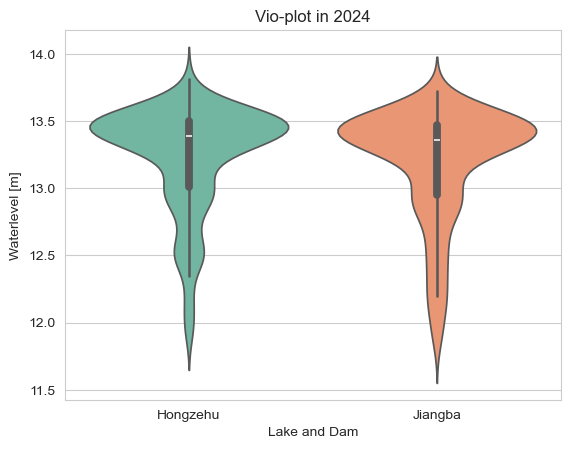

In [47]:
sns.violinplot(x="Lake and Dam", y="Waterlevel [m]", data=vio_set(x_twofour_hongzehu_shuiwei, [twofour_hongzehu_shuiwei_float, twofour_jiangba_shuiwei_float]), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2024")
plt.show()

## （三）2024年洪泽湖和蒋坝水位差变化图及正态分布拟合

In [48]:
twofour_shuiweicha = np.array(twofour_hongzehu_shuiwei_float) - np.array(twofour_jiangba_shuiwei_float)

In [49]:
params_twofour, _ = curve_fit(gaussian_fit, x_twofour_hongzehu_shuiwei, abs(twofour_shuiweicha))
mu_twofour, sigma_twofour, A_twofour = params_twofour

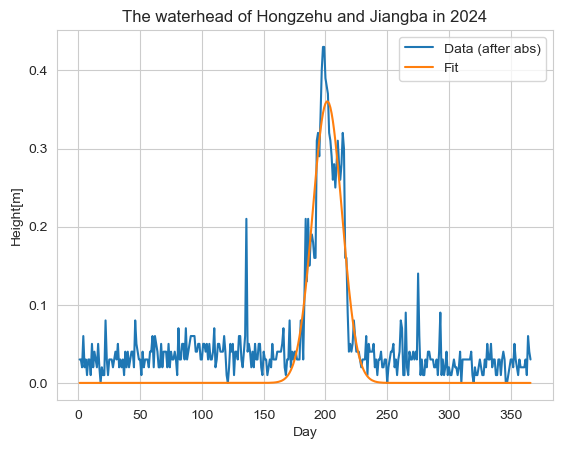

In [50]:
plt.plot(x_twofour_hongzehu_shuiwei, abs(twofour_shuiweicha), label="Data (after abs)")
plt.plot(x_twofour_hongzehu_shuiwei, gaussian_fit(x_twofour_hongzehu_shuiwei, mu_twofour, sigma_twofour, A_twofour), label="Fit")
#plt.xlim(100, 200)
plt.title("The waterhead of Hongzehu and Jiangba in 2024")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

In [51]:
print("mu =", mu_twofour)
print("sigma =", sigma_twofour)
print("A =", A_twofour)

mu = 201.49513939662813
sigma = 11.853947471007071
A = 10.709903309099522


 ## （四）2024年洪泽湖和蒋坝水位差Count图及核密度估计

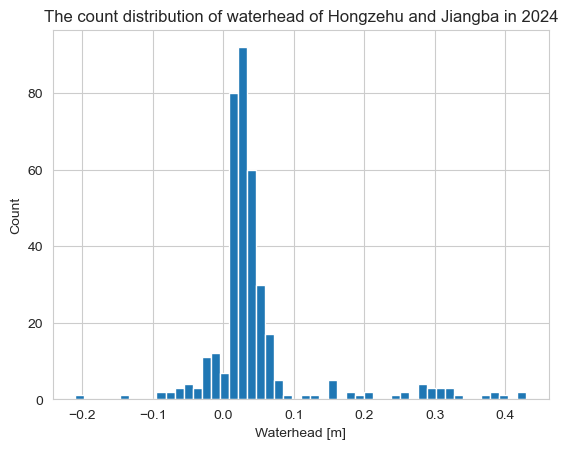

In [52]:
n_twofour, bins_twofour, patches_twofour = plt.hist(twofour_shuiweicha, bins=50)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2024")
plt.show()

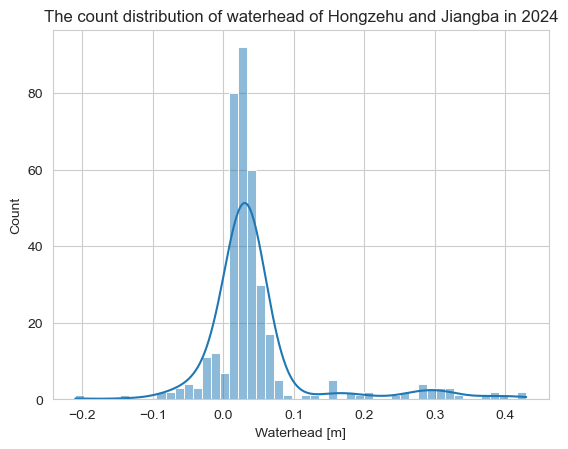

In [53]:
sns.histplot(twofour_shuiweicha, bins=50, kde=True)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba in 2024")
plt.show()

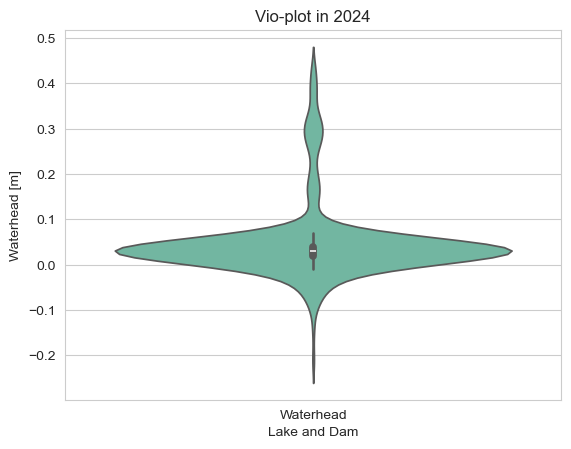

In [54]:
sns.violinplot(x="Lake and Dam", y="Waterhead [m]", data=vio_set(x_twofour_hongzehu_shuiwei, [twofour_shuiweicha], "Waterhead [m]"), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot in 2024")
plt.show()

## 2020至2024年 综合分析

## （一）2020至2024年洪泽湖平均水位变化图

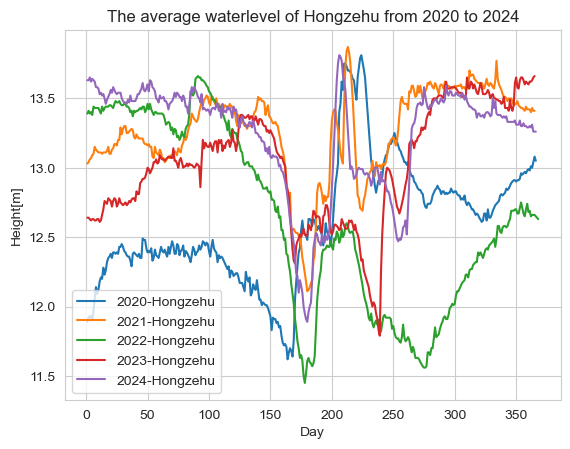

In [55]:
plt.plot(x_twozero_hongzehu_shuiwei, twozero_hongzehu_shuiwei_float, label="2020-Hongzehu")
plt.plot(x_twoone_hongzehu_shuiwei, twoone_hongzehu_shuiwei_float, label="2021-Hongzehu")
plt.plot(x_twotwo_hongzehu_shuiwei, twotwo_hongzehu_shuiwei_float, label="2022-Hongzehu")
plt.plot(x_twothree_hongzehu_shuiwei, twothree_hongzehu_shuiwei_float, label="2023-Hongzehu")
plt.plot(x_twofour_hongzehu_shuiwei, twofour_hongzehu_shuiwei_float, label="2024-Hongzehu")
#plt.xlim(100, 200)
plt.title("The average waterlevel of Hongzehu from 2020 to 2024")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

## （二）2020至2024年蒋坝平均水位变化图

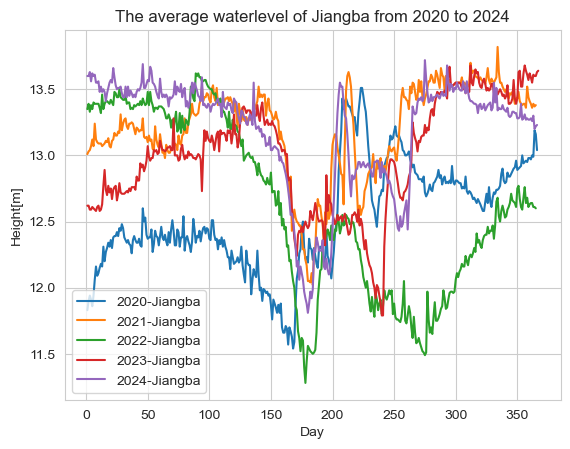

In [56]:
plt.plot(x_twozero_jiangba_shuiwei, twozero_jiangba_shuiwei_float, label="2020-Jiangba")
plt.plot(x_twoone_jiangba_shuiwei, twoone_jiangba_shuiwei_float, label="2021-Jiangba")
plt.plot(x_twotwo_jiangba_shuiwei, twotwo_jiangba_shuiwei_float, label="2022-Jiangba")
plt.plot(x_twothree_jiangba_shuiwei, twothree_jiangba_shuiwei_float, label="2023-Jiangba")
plt.plot(x_twofour_jiangba_shuiwei, twofour_jiangba_shuiwei_float, label="2024-Jiangba")
#plt.xlim(100, 200)
plt.title("The average waterlevel of Jiangba from 2020 to 2024")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

## （三）2020至2024年洪泽湖和蒋坝平均水位变化图

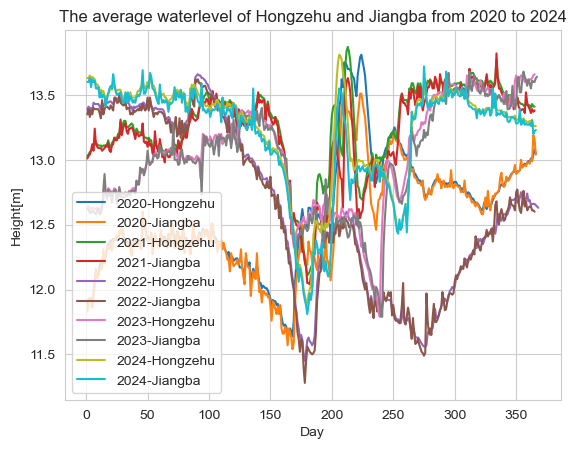

In [57]:
plt.plot(x_twozero_hongzehu_shuiwei, twozero_hongzehu_shuiwei_float, label="2020-Hongzehu")
plt.plot(x_twozero_jiangba_shuiwei, twozero_jiangba_shuiwei_float, label="2020-Jiangba")
plt.plot(x_twoone_hongzehu_shuiwei, twoone_hongzehu_shuiwei_float, label="2021-Hongzehu")
plt.plot(x_twoone_jiangba_shuiwei, twoone_jiangba_shuiwei_float, label="2021-Jiangba")
plt.plot(x_twotwo_hongzehu_shuiwei, twotwo_hongzehu_shuiwei_float, label="2022-Hongzehu")
plt.plot(x_twotwo_jiangba_shuiwei, twotwo_jiangba_shuiwei_float, label="2022-Jiangba")
plt.plot(x_twothree_hongzehu_shuiwei, twothree_hongzehu_shuiwei_float, label="2023-Hongzehu")
plt.plot(x_twothree_jiangba_shuiwei, twothree_jiangba_shuiwei_float, label="2023-Jiangba")
plt.plot(x_twofour_hongzehu_shuiwei, twofour_hongzehu_shuiwei_float, label="2024-Hongzehu")
plt.plot(x_twofour_jiangba_shuiwei, twofour_jiangba_shuiwei_float, label="2024-Jiangba")
#plt.xlim(100, 200)
plt.title("The average waterlevel of Hongzehu and Jiangba from 2020 to 2024")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

## （四）2020至2024年洪泽湖和蒋坝平均水位Count图、核密度估计及小提琴图

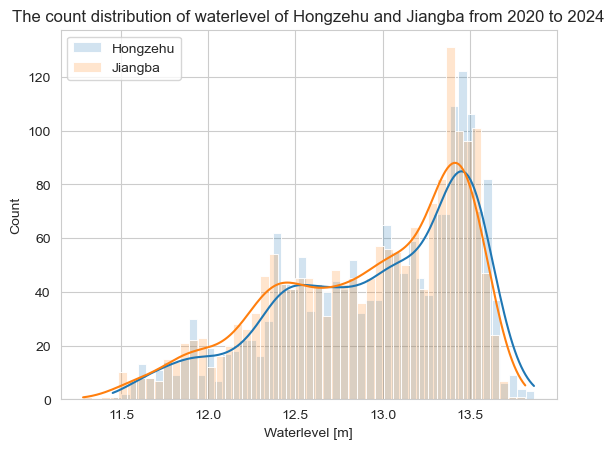

In [58]:
sns.histplot(twozero_hongzehu_shuiwei_float + twoone_hongzehu_shuiwei_float + twotwo_hongzehu_shuiwei_float + twothree_hongzehu_shuiwei_float +  twofour_hongzehu_shuiwei_float, bins=50, alpha=0.2, label="Hongzehu", kde=True)
sns.histplot(twozero_jiangba_shuiwei_float + twoone_jiangba_shuiwei_float + twotwo_jiangba_shuiwei_float + twothree_jiangba_shuiwei_float + twofour_jiangba_shuiwei_float, bins=50, alpha=0.2, label="Jiangba", kde=True)
plt.xlabel("Waterlevel [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterlevel of Hongzehu and Jiangba from 2020 to 2024")
plt.legend()
plt.show()

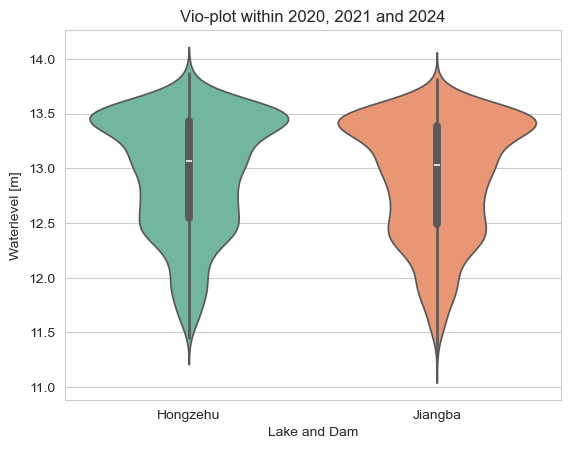

In [59]:
sns.violinplot(x="Lake and Dam", y="Waterlevel [m]", data=vio_set(x_twozero_hongzehu_shuiwei + x_twoone_hongzehu_shuiwei + x_twotwo_hongzehu_shuiwei + x_twothree_hongzehu_shuiwei + x_twofour_hongzehu_shuiwei, [twozero_hongzehu_shuiwei_float + twoone_hongzehu_shuiwei_float + twotwo_hongzehu_shuiwei_float + twothree_hongzehu_shuiwei_float + twofour_hongzehu_shuiwei_float, twozero_jiangba_shuiwei_float + twoone_jiangba_shuiwei_float + twotwo_jiangba_shuiwei_float + twothree_jiangba_shuiwei_float + twofour_jiangba_shuiwei_float]), hue="Lake and Dam", palette='Set2', legend=False)
plt.title("Vio-plot within 2020, 2021 and 2024")
plt.show()

## （五）2020至2024年洪泽湖和蒋坝各年平均水位小提琴图

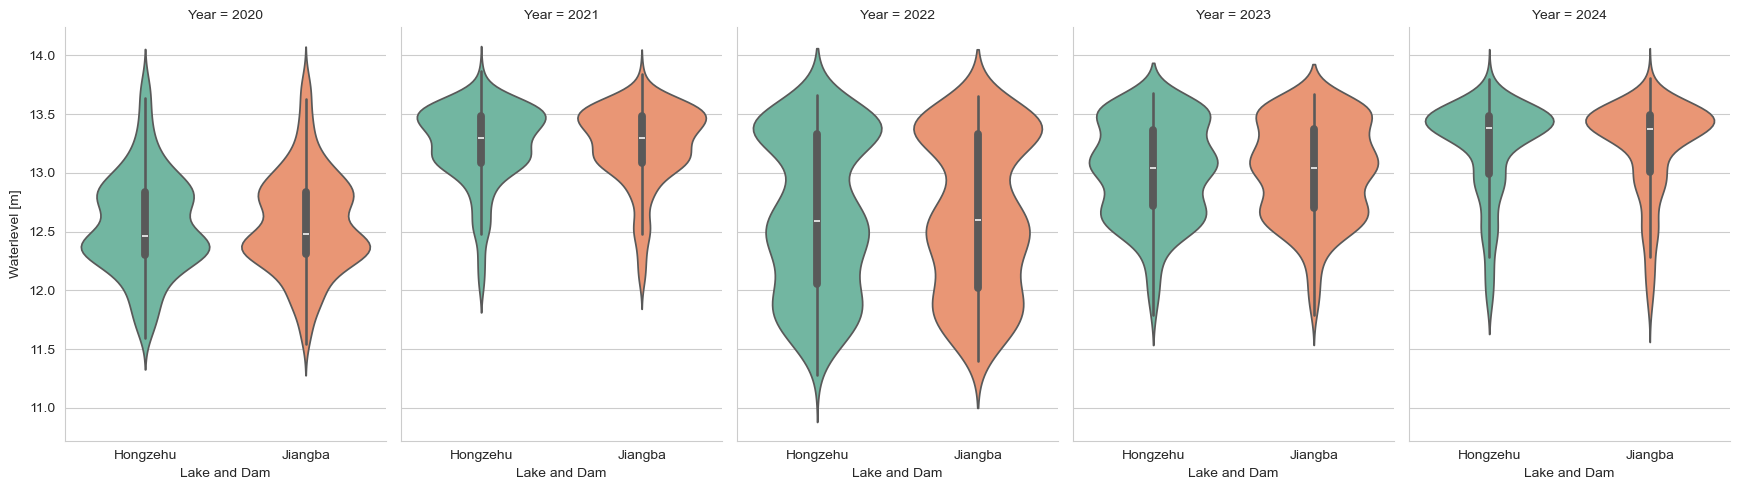

In [60]:
years = ['2020', '2021', '2022', '2023', '2024']
data_dict = {
    '2020': {
        'x_data': ['Hongzehu', 'Jiangba'] * len(twozero_hongzehu_shuiwei_float),
        'y_data': twozero_hongzehu_shuiwei_float + 
                  twozero_jiangba_shuiwei_float
    },
    '2021': {
        'x_data': ['Hongzehu', 'Jiangba'] * len(twoone_hongzehu_shuiwei_float),
        'y_data': twoone_hongzehu_shuiwei_float + 
                  twoone_jiangba_shuiwei_float
    },
    '2022': {
        'x_data': ['Hongzehu', 'Jiangba'] * len(twotwo_hongzehu_shuiwei_float),
        'y_data': twotwo_hongzehu_shuiwei_float + 
                  twotwo_jiangba_shuiwei_float
    },
    '2023': {
        'x_data': ['Hongzehu', 'Jiangba'] * len(twothree_hongzehu_shuiwei_float),
        'y_data': twothree_hongzehu_shuiwei_float + 
                  twothree_jiangba_shuiwei_float
    },
    '2024': {
        'x_data': ['Hongzehu', 'Jiangba'] * len(twofour_hongzehu_shuiwei_float),
        'y_data': twofour_hongzehu_shuiwei_float + 
                  twofour_jiangba_shuiwei_float
    }
}

df_list = []
for year in years:
    temp_df = pd.DataFrame({
        'Lake and Dam': data_dict[year]['x_data'],
        'Waterlevel [m]': data_dict[year]['y_data'],
        'Year': year
    })
    df_list.append(temp_df)
combined_df = pd.concat(df_list)

g = sns.FacetGrid(combined_df, col='Year', height=5, aspect=0.7)
g.map_dataframe(sns.violinplot, x='Lake and Dam', 
                y='Waterlevel [m]', hue='Lake and Dam',
                palette='Set2', legend=False)
plt.show()

## （六）2020至2024年洪泽湖和蒋坝水位差变化图

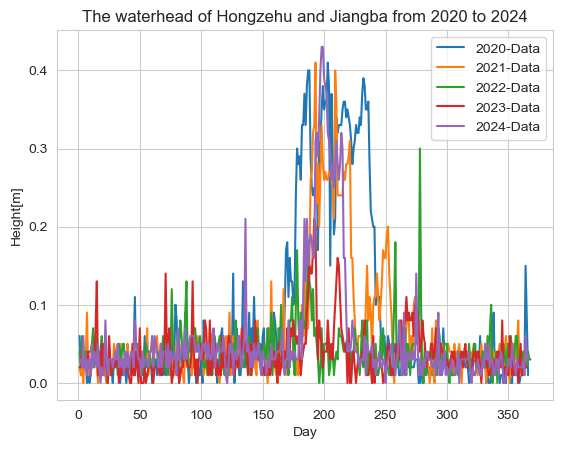

In [61]:
plt.plot(x_twozero_hongzehu_shuiwei, abs(twozero_shuiweicha), label="2020-Data")
plt.plot(x_twoone_hongzehu_shuiwei, abs(twoone_shuiweicha), label="2021-Data")
plt.plot(x_twotwo_hongzehu_shuiwei, abs(twotwo_shuiweicha), label="2022-Data")
plt.plot(x_twothree_hongzehu_shuiwei, abs(twothree_shuiweicha), label="2023-Data")
plt.plot(x_twofour_hongzehu_shuiwei, abs(twofour_shuiweicha), label="2024-Data")
#plt.xlim(100, 200)
plt.title("The waterhead of Hongzehu and Jiangba from 2020 to 2024")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

## （七）2020至2024年洪泽湖和蒋坝水位差变化图正态分布拟合

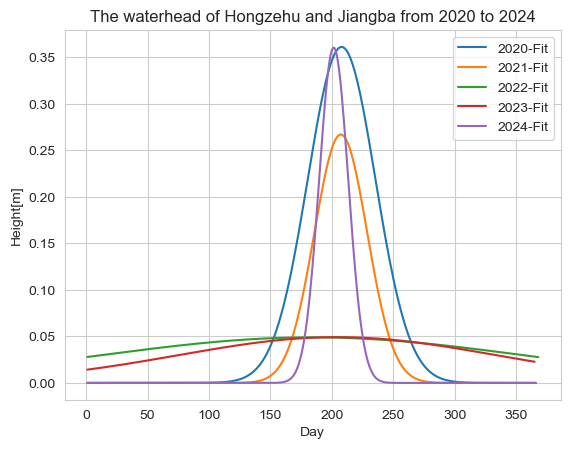

In [62]:
#plt.plot(x_twozero_hongzehu_shuiwei, abs(twozero_shuiweicha), label="2020-Data")
#plt.plot(x_twoone_hongzehu_shuiwei, abs(twoone_shuiweicha), label="2021-Data")
plt.plot(x_twozero_hongzehu_shuiwei, gaussian_fit(x_twozero_hongzehu_shuiwei, mu_twozero, sigma_twozero, A_twozero), label="2020-Fit")
plt.plot(x_twoone_hongzehu_shuiwei, gaussian_fit(x_twoone_hongzehu_shuiwei, mu_twoone, sigma_twoone, A_twoone), label="2021-Fit")
plt.plot(x_twotwo_hongzehu_shuiwei, gaussian_fit(x_twotwo_hongzehu_shuiwei, mu_twotwo, sigma_twotwo, A_twotwo), label="2022-Fit")
plt.plot(x_twothree_hongzehu_shuiwei, gaussian_fit(x_twothree_hongzehu_shuiwei, mu_twothree, sigma_twothree, A_twothree), label="2023-Fit")
plt.plot(x_twofour_hongzehu_shuiwei, gaussian_fit(x_twofour_hongzehu_shuiwei, mu_twofour, sigma_twofour, A_twofour), label="2024-Fit")
plt.title("The waterhead of Hongzehu and Jiangba from 2020 to 2024")
plt.xlabel("Day")
plt.ylabel("Height[m]")
plt.legend()
plt.show()

In [63]:
print("mu_20 =", mu_twozero)
print("mu_21 =", mu_twoone)
print("mu_22 =", mu_twotwo)
print("mu_23 =", mu_twothree)
print("mu_24 =", mu_twofour)
print("sigma_20 =", sigma_twozero)
print("sigma_21 =", sigma_twoone)
print("sigma_22 =", sigma_twotwo)
print("sigma_23 =", sigma_twothree)
print("sigma_24 =", sigma_twofour)
print("A_20 =", A_twozero)
print("A_21 =", A_twoone)
print("A_22 =", A_twotwo)
print("A_23 =", A_twothree)
print("A_24 =", A_twofour)

mu_20 = 207.92267493156305
mu_21 = 207.29885028335252
mu_22 = 184.08014604510495
mu_23 = 204.39541572844334
mu_24 = 201.49513939662813
sigma_20 = 27.545756571714943
sigma_21 = 21.444230944642676
sigma_22 = 172.6533362126377
sigma_23 = 129.28478322591687
sigma_24 = 11.853947471007071
A_20 = 24.93575756561633
A_21 = 14.351984509656162
A_22 = 21.18872655218972
A_23 = 15.952403874961254
A_24 = 10.709903309099522


## （八）2020至2024年洪泽湖和蒋坝水位差Count图、核密度估计及小提琴图

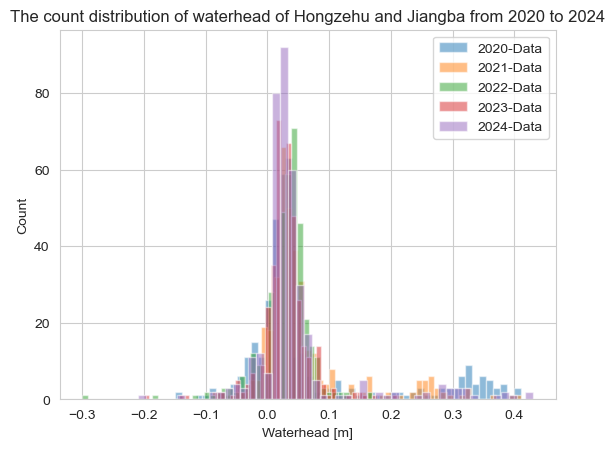

In [64]:
plt.hist(twozero_shuiweicha, bins=50, alpha=0.5, label="2020-Data")
plt.hist(twoone_shuiweicha, bins=50, alpha=0.5, label="2021-Data")
plt.hist(twotwo_shuiweicha, bins=50, alpha=0.5, label="2022-Data")
plt.hist(twothree_shuiweicha, bins=50, alpha=0.5, label="2023-Data")
plt.hist(twofour_shuiweicha, bins=50, alpha=0.5, label="2024-Data")
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba from 2020 to 2024")
plt.legend()
plt.show()

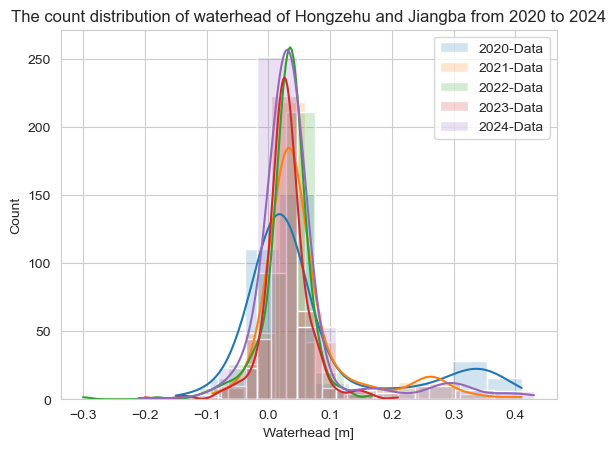

In [65]:
sns.histplot(twozero_shuiweicha, bins=10, alpha=0.2, label="2020-Data", kde=True)
sns.histplot(twoone_shuiweicha, bins=10, alpha=0.2, label="2021-Data", kde=True)
sns.histplot(twotwo_shuiweicha, bins=10, alpha=0.2, label="2022-Data", kde=True)
sns.histplot(twothree_shuiweicha, bins=10, alpha=0.2, label="2023-Data", kde=True)
sns.histplot(twofour_shuiweicha, bins=10, alpha=0.2, label="2024-Data", kde=True)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba from 2020 to 2024")
plt.legend()
plt.show()

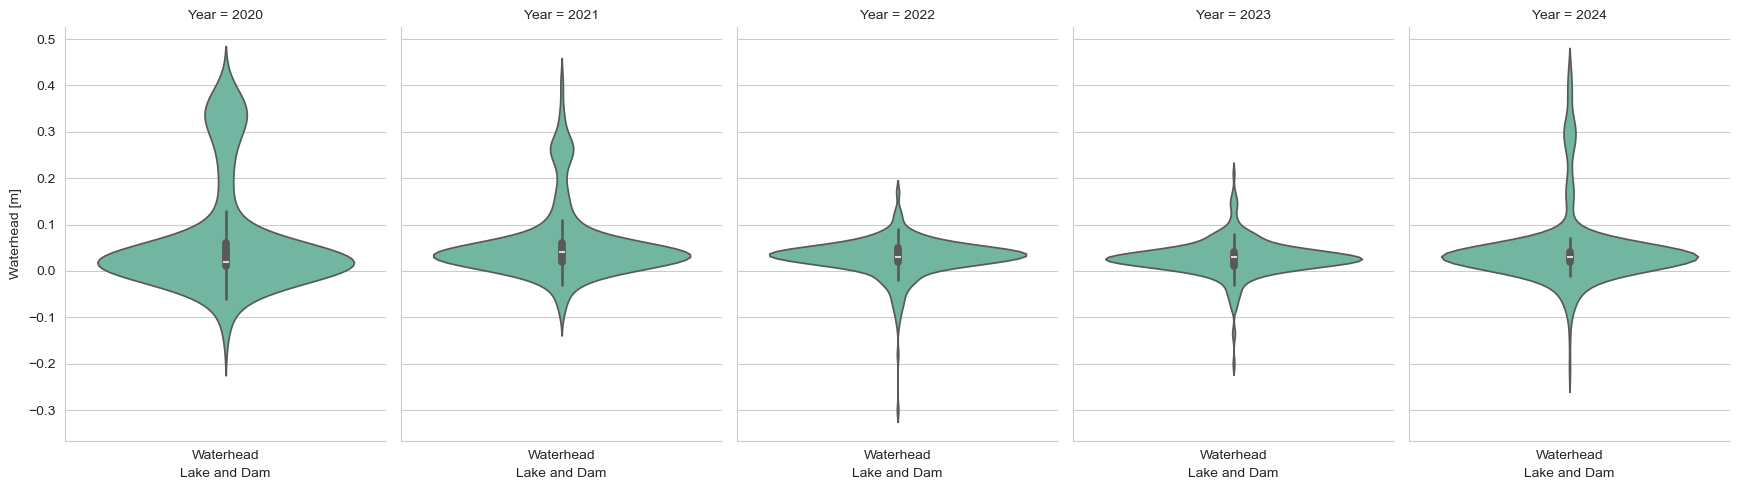

In [66]:
shuiweicha_data_dict = {
    '2020': {
        'x_data': ['Waterhead'] * len(twozero_shuiweicha),
        'y_data': twozero_shuiweicha
    },
    '2021': {
        'x_data': ['Waterhead'] * len(twoone_shuiweicha),
        'y_data': twoone_shuiweicha
    },
    '2022': {
        'x_data': ['Waterhead'] * len(twotwo_shuiweicha),
        'y_data': twotwo_shuiweicha
    },
    '2023': {
        'x_data': ['Waterhead'] * len(twothree_shuiweicha),
        'y_data': twothree_shuiweicha
    },
    '2024': {
        'x_data': ['Waterhead'] * len(twofour_shuiweicha),
        'y_data': twofour_shuiweicha
    }
}

shuiweicha_df_list = []
for year in years:
    shuiweicha_temp_df = pd.DataFrame({
        'Lake and Dam': shuiweicha_data_dict[year]['x_data'],
        'Waterhead [m]': shuiweicha_data_dict[year]['y_data'],
        'Year': year
    })
    shuiweicha_df_list.append(shuiweicha_temp_df)
shuiweicha_combined_df = pd.concat(shuiweicha_df_list)

g_shuiweicha = sns.FacetGrid(shuiweicha_combined_df, col='Year', height=5, aspect=0.7)
g_shuiweicha.map_dataframe(sns.violinplot, x='Lake and Dam', 
                y='Waterhead [m]', hue='Lake and Dam',
                palette='Set2', legend=False)
plt.show()

## （九）主peak与次peak面积之比计算

### 1. 2020年计算

In [67]:
bins_xiaoyu_twozero, bins_dayu_twozero = divide_list(bins_twozero, 2 / 3, 2 / 3)
n_xiaoyu_twozero, n_dayu_twozero = divide_list(n_twozero, 2 / 3, 2 / 3)

In [68]:
xiaoyu_area_twozero = sum(n_xiaoyu_twozero)
dayu_area_twozero = sum(n_dayu_twozero)

In [69]:
print(xiaoyu_area_twozero / dayu_area_twozero)

5.385964912280702


### 2. 2020至2024年之和计算

In [70]:
n_new = np.array(n_twozero) + np.array(n_twoone) + np.array(n_twotwo) + np.array(n_twothree) + np.array(n_twofour)

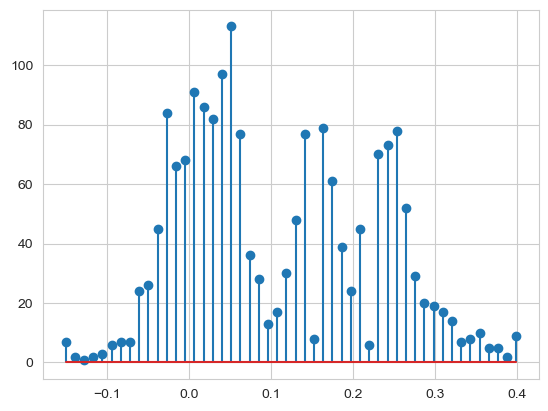

In [71]:
plt.stem(bins_twozero[:-1], n_new)
plt.show()

In [72]:
bins_xiaoyu_new, bins_dayu_new = divide_list(bins_twozero, 1 / 2, 1 / 2)
n_xiaoyu_new, n_dayu_new = divide_list(n_new, 1 / 2, 1 / 2)

In [73]:
print(max(n_xiaoyu_new)/ max(n_dayu_new))

1.4303797468354431


### 3. 2020至2024年之并计算

In [74]:
union_list_202124 = union_list([n_twozero, n_twoone, n_twotwo, n_twothree, n_twofour])

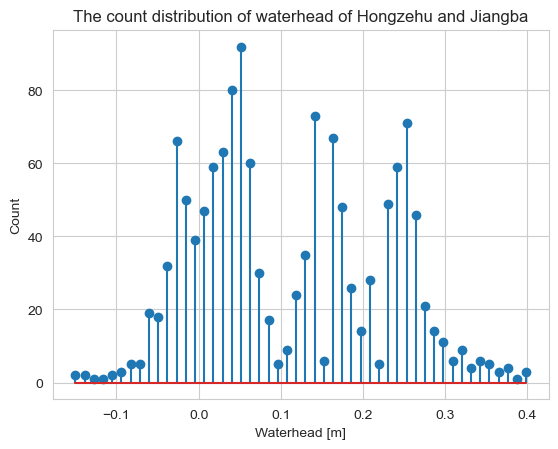

In [75]:
plt.stem(bins_twozero[:-1], union_list_202124)
plt.xlabel("Waterhead [m]")
plt.ylabel("Count")
plt.title("The count distribution of waterhead of Hongzehu and Jiangba")
plt.show()

In [76]:
bins_xiaoyu_union, bins_dayu_union = divide_list(bins_twozero, 1 / 2, 1 / 2)
n_xiaoyu_union, n_dayu_union = divide_list(union_list_202124, 1 / 2, 1 / 2)

In [77]:
print(sum(n_xiaoyu_union) / sum(n_dayu_union))

1.1905537459283388
